# Exploratory Data Analysis on Red Wine Quality

In [30]:
import os
import numpy as np
import pandas as pd
import csv
%matplotlib inline
pd.set_option('display.notebook_repr_html', True)

In [31]:
#1: Import data and show first few rows
df1 = pd.read_csv(os.path.join('..', 'datasets', 'red_wine_quality.csv'))
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,origin
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Imported
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Local
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Imported
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Local
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Local


In [32]:
#2: Transform categorical data and drop columns as needed
dummies = pd.get_dummies(df1.origin, prefix='Origin', drop_first = True)
# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
data = pd.concat([df1, dummies], axis=1)
data = data.drop(["origin"], axis=1)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Origin_Local
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [33]:
#3: Get the correlations between variables
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Origin_Local
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052,0.026492
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558,0.015066
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373,-0.013665
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732,-0.036529
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907,0.005473
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656,0.047401
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100,0.021963
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919,0.039841
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731,-0.007778
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397,0.020395


In [34]:
#4: calculate kurtosis of your data.
data.kurt()

fixed acidity            1.132143
volatile acidity         1.225542
citric acid             -0.788998
residual sugar          28.617595
chlorides               41.715787
free sulfur dioxide      2.023562
total sulfur dioxide     3.809824
density                  0.934079
pH                       0.806943
sulphates               11.720251
alcohol                  0.200029
quality                  0.296708
Origin_Local            -2.000583
dtype: float64

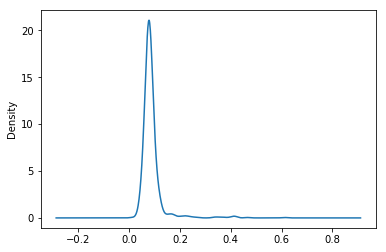

In [35]:
#5: Which variable has the most positive kurtosis? Plot its density plot. For density plot, 
# refer to: http://pandas.pydata.org/pandas-docs/version/0.15.0/visualization.html
data.chlorides.plot(kind='kde')

In [36]:
#6: calculate skewness of your data.
data.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
Origin_Local           -0.043829
dtype: float64

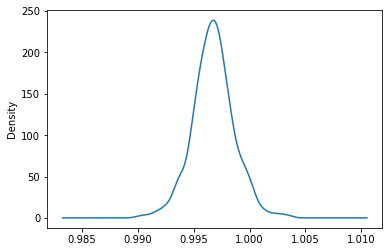

In [37]:
#7: Which variable has the most null kurtosis? Plot its density plot. For density plot, 
# refer to: http://pandas.pydata.org/pandas-docs/version/0.15.0/visualization.html
data.density.plot(kind='kde')

In [38]:
#8: Get the basics statistics of your data
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Origin_Local
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0.510944
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.500037
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.000000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x12645f750>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x126710b10>], dtype=object)

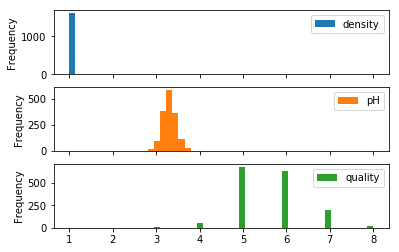

In [39]:
#9: plot histogram of density, pH, and quality
data[["density","pH","quality"]].plot.hist(subplots=True, bins=50)

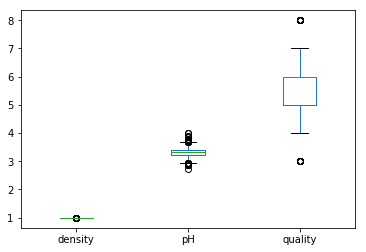

In [40]:
#10: plot boxplots of density, pH, and quality
data[["density","pH","quality"]].plot(kind='box')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x124c6b710>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x134462c90>]], dtype=object)

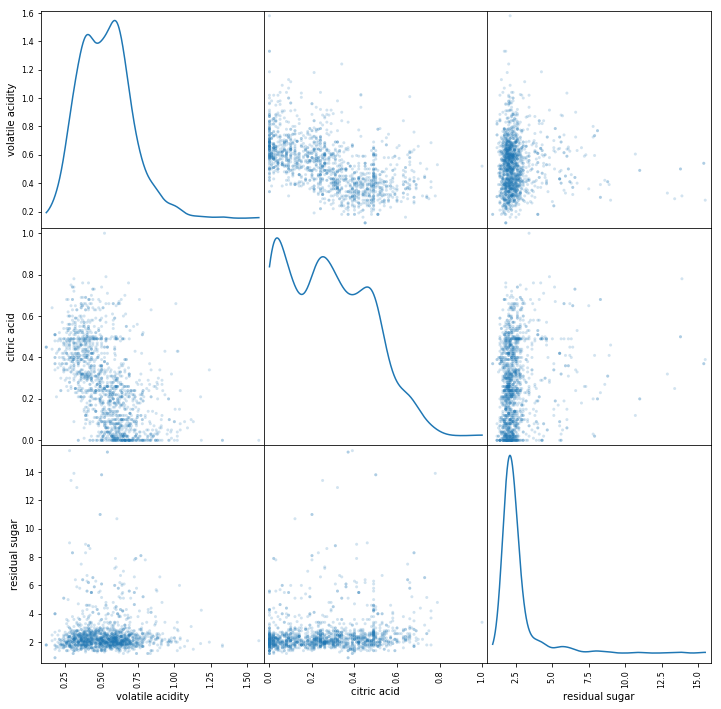

In [50]:
# Bonus: plot scatter matrix (look at pandas scatter matrix for volatile acidity, citric acid, residual sugar)
from pandas.plotting import scatter_matrix
scatter_matrix(data.iloc[:,1:4], alpha=0.2, figsize=(12, 12), diagonal='kde')